In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [3]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [4]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

In [5]:
dflog=pd.read_csv("data/01_heights_weights_genders.csv")
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


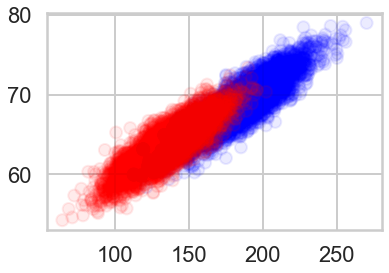

In [6]:
plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=="Male"], alpha=0.08);

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split


def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    fold = KFold(nfold, shuffle = False, random_state = None)
    for train, test in fold.split(y): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [11]:
from sklearn.model_selection import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender=="Male").values)

In [12]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print(max_score, best_C)

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\prog

0.9185333333333332 0.1


c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\prog

In [13]:
clfl=LogisticRegression(C=best_C)
clfl.fit(Xlr, ylr)
ypred=clfl.predict(Xtestlr)
accuracy_score(ypred, ytestlr)

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.922

In [14]:
from sklearn.model_selection import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\prog

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [15]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
accuracy_score(ypred2, ytestlr)

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.922

In [16]:
data=np.load("data/imag.pix.npy")
y=np.load("data/imag.lbl.npy")
STANDARD_SIZE = (322, 137)#standardized pixels in image.
data.shape, y.shape

((87, 132342), (87,))

In [17]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

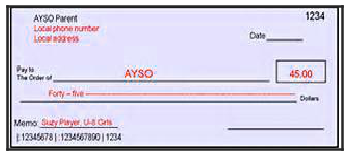

In [18]:
display_image(data[5])

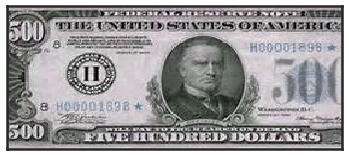

In [19]:
display_image(data[50])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X = pca.fit_transform(data)

In [21]:
print(pca.explained_variance_ratio_.sum())

0.9425202943237686


In [22]:
pca.explained_variance_ratio_*100

array([35.92596698,  6.29318801,  4.10778347,  3.11950952,  2.81695972,
        2.28831619,  2.10127948,  1.87404974,  1.73264634,  1.53023755,
        1.42159664,  1.31839376,  1.2470153 ,  1.16381614,  1.09958283,
        1.06073   ,  1.00742996,  0.98023479,  0.96055767,  0.91534403,
        0.90185227,  0.8521297 ,  0.83674066,  0.79692015,  0.75487059,
        0.725023  ,  0.70815887,  0.67963001,  0.66087874,  0.64768934,
        0.62732051,  0.59468303,  0.58288938,  0.5744463 ,  0.57273756,
        0.55243307,  0.53817023,  0.53329394,  0.51636343,  0.49318414,
        0.48583037,  0.47683224,  0.47079193,  0.45583014,  0.44385165,
        0.43960215,  0.43355828,  0.42707685,  0.4206244 ,  0.40912987,
        0.40501849,  0.39235026,  0.38873398,  0.38162314,  0.37751757,
        0.36146046,  0.35618502,  0.34592196,  0.33439361,  0.33164406])

In [23]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,y,label,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,1,check,-22536.362571,-2428.344444,-2133.778014,-328.317575,-1065.234768,79.694874,-424.991913,622.457660,-2490.378111,-859.079975,-1072.745980,276.551221,-1116.986784,714.710511,-787.432385,414.611431,-196.222912,473.940649,-427.617125,-611.846326,-589.519112,-267.902497,-985.439230,953.254809,1040.340955,573.602993,-51.045809,-97.048165,-520.309576,546.254753,-647.810870,77.267124,-700.101159,1249.944424,-608.370514,-91.307731,483.312695,312.684330,-235.915360,57.807620,-456.698817,696.804312,512.693138,-394.583378,443.879086,-200.440086,45.404929,346.363222,629.837867,-392.021124,-585.079309,215.564205,286.348754,-64.093215,-308.321057,454.131891,352.717647,-45.765080,-125.101380,30.678623
1,1,check,-22226.658684,-709.255990,-288.825471,-1300.632712,-792.074893,217.398068,1076.784257,-2115.113572,-875.555330,-1125.252398,-343.468524,-43.787595,547.768970,358.603186,-1761.311330,-372.661232,813.543061,294.495958,-939.175575,153.328758,-1122.415897,506.554057,-814.279234,718.922169,292.574549,-115.287967,809.850733,1157.695640,-356.266836,122.131883,-856.269278,579.465295,343.807910,163.141940,-683.883987,-644.793542,-116.596540,-167.452842,-133.060503,-342.530722,117.381629,-70.317305,593.074798,37.420053,305.392414,27.473081,-85.982451,262.601156,-1142.743772,397.985485,-416.604264,-118.397811,158.333888,430.711732,413.966505,518.936254,122.850512,181.894014,-108.460081,-200.990986
2,1,check,-17364.260784,-4252.026985,793.805654,-1362.057579,-374.222994,3142.085518,2514.176520,1443.727152,-121.022098,-419.911728,-2083.035670,1717.626787,-723.398271,-1240.027934,-310.474509,-1060.588574,1385.202595,-801.570235,-2598.027783,-874.472040,3386.207369,-390.885667,-3416.720991,1338.397185,-4743.695462,1024.787319,2189.346200,-692.622910,1370.477864,-2144.857997,-657.290332,1691.993624,1771.763211,-3134.519443,-837.017952,2231.553902,-3178.677636,3087.203124,883.753538,344.375141,1612.844814,-3544.381964,3214.139457,1467.704073,899.541042,727.318776,532.222905,-1176.157779,154.019799,-2786.064544,-2602.544443,-1625.939271,1213.035468,-2339.934542,-573.441225,2609.311643,-587.139408,-1091.788464,-1047.801098,1589.091326
3,1,check,-22847.256199,-900.591966,577.198842,-180.296749,-733.190451,-108.066544,1441.915398,-1069.748645,844.461405,-1389.521464,1470.521481,-724.957263,-578.213810,-254.819198,933.418639,170.415835,-302.691567,877.833164,-182.649755,1237.388364,554.861634,-176.892483,-335.981211,-368.616669,-932.284889,193.533642,1324.494742,86.186726,-301.417394,-460.150696,-173.095002,-55.113744,150.968426,843.996432,-187.040367,666.236394,306.985275,376.724873,156.969627,-347.096039,1409.056989,-738.015798,-1280.355251,534.241609,423.116731,-401.871253,698.402512,-345.995261,1080.327475,-1647.470206,130.045724,221.469958,102.749329,-201.881962,-101.036299,-972.740678,819.513925,-760.598927,1010.646094,-18.089796
4,1,check,-15868.672595,3259.491822,506.803926,-919.635530,2166.558171,-981.606928,-1669.736394,-391.334375,1735.696893,163.564224,-1627.027785,-556.073082,-863.209086,1721.761430,944.456105,-1134.307605,2139.359253,766.347783,-1093.467112,605.081143,-26.981326,82.248934,-508.816284,1107.245331,336.173889,-1234.793682,-715.083570,-718.612106,-156.128967,-894.969746,985.451806,-3607.021171,2112.699854,-3368.233934,-933.098862,-2131.323883,1890.819261,2152.235473,2530.906500,-466.994407,155.944405,1264.884757,1400.474572,-1312.351069,-327.562346,-1014.327984,-380.921045,760.456025,-3156.008186,1644.889805,-831.232356,-2069.637807,114.955345,314.537537,3857.950638,-2650.128908,-1248.458564,-1810.475708,-1660.003114,-1729.206612


In [24]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

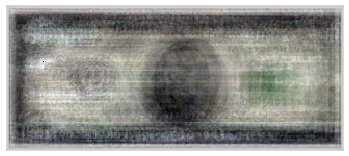

In [25]:
display_component(pca,0)

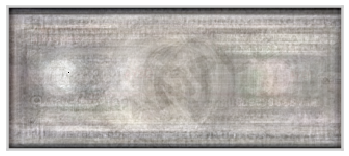

In [26]:
display_component(pca,1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


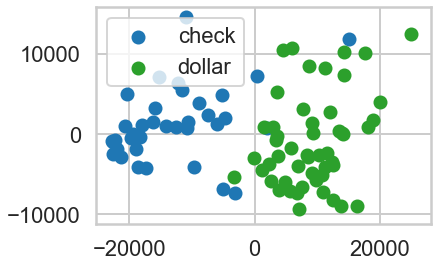

In [27]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print( "Accuracy on training data: %0.2f" % (training_accuracy))
        print ("Accuracy on test data:     %0.2f" % (test_accuracy))
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 1.00
Accuracy on test data:     0.91


(1, 1.0, 0.9142857142857143)

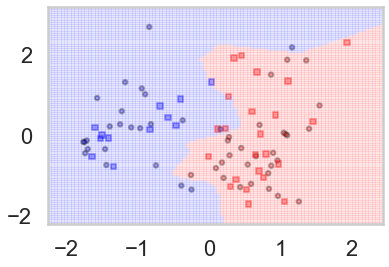

In [29]:
classify(Xs,ys,1)

Accuracy on training data: 0.54
Accuracy on test data:     0.66


(50, 0.5384615384615384, 0.6571428571428571)

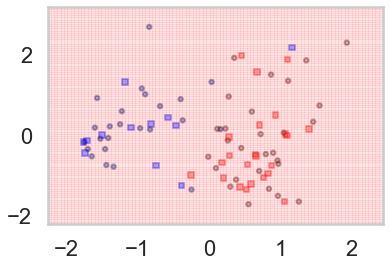

In [30]:
classify(Xs,ys,50)

In [31]:
fits={}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs, ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

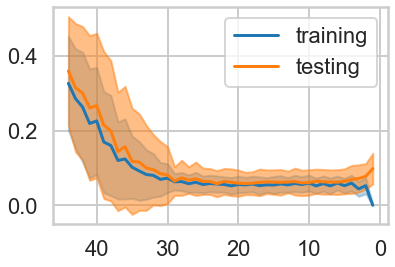

In [32]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)

plt.legend();

In [33]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print ("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [34]:
from sklearn.model_selection import train_test_split
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [35]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, df, ['pc1','pc2'], 'label', 'check' )

BEST PARAMS {'n_neighbors': 5}
Accuracy on training data: 0.94
Accuracy on test data:     0.94


c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


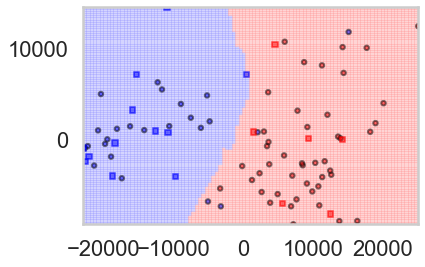

In [36]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'axes'
  """
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'axes'
  


TypeError: clabel() got an unexpected keyword argument 'axes'

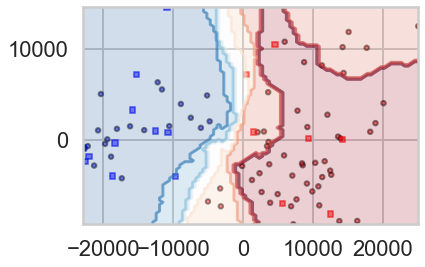

In [37]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[ 6,  0],
       [ 1, 11]], dtype=int64)

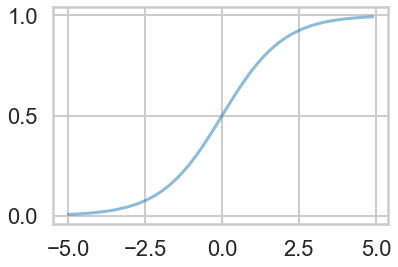

In [39]:
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);

In [40]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [41]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]}, dflog, ['Weight', 'Height'], 'Gender','Male')

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\prog

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.92
Accuracy on test data:     0.93


c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\akshitha\appdata\local\prog

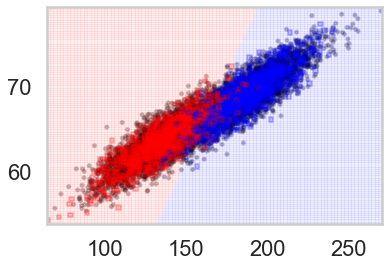

In [42]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);

In [43]:
clf_l.predict_proba(Xtest_l)

array([[4.60585505e-03, 9.95394145e-01],
       [6.38720432e-04, 9.99361280e-01],
       [3.94443637e-03, 9.96055564e-01],
       ...,
       [6.82774637e-02, 9.31722536e-01],
       [4.97620432e-02, 9.50237957e-01],
       [2.90525320e-01, 7.09474680e-01]])

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'axes'
  """
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'axes'
  


TypeError: clabel() got an unexpected keyword argument 'axes'

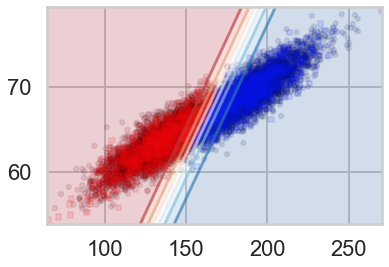

In [44]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1);